# **Josué Emmanuel Flores Mendoza A00833132**

 **Parte 1: Cargar datos, verificarlos y analizar features importantes**

In [ ]:
#from google.colab import drive

#drive.mount("/content/gdrive")
#!pwd # directorio de trabajo

Mounted at /content/gdrive
/content


In [ ]:
#%cd "/content/gdrive/MyDrive/Actividades IA avanzada/Módulo ML/Portafolio 1"
#!ls # Lista de archivos ubicados en el folder

/content/gdrive/MyDrive/Actividades IA avanzada/Módulo ML/Portafolio 1
 heart-disease.csv		 'Portafolio 1.ipynb'
'Portafolio 1 Con Target.ipynb'  'Portafolio 1 Mejorado.ipynb'


In [ ]:
# Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math

In [ ]:
# Cargar dataframe
df = pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Columns

*   age: Age of the patient (in years)
*   sex: Sex of the patient (1 = male, 0 = female)
*   cp: Chest pain type (1-4) Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
*   trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
*   chol: Serum cholesterol in mg/dl
*   fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
*   restecg: Resting electrocardiographic results (0-2)
*   thalach: Maximum heart rate achieved
*   exang: Exercise-induced angina (1 = yes; 0 = no)
*   oldpeak: ST depression induced by exercise relative to rest
*   target: If patient have heart-disease (1 = true, 0 = false)


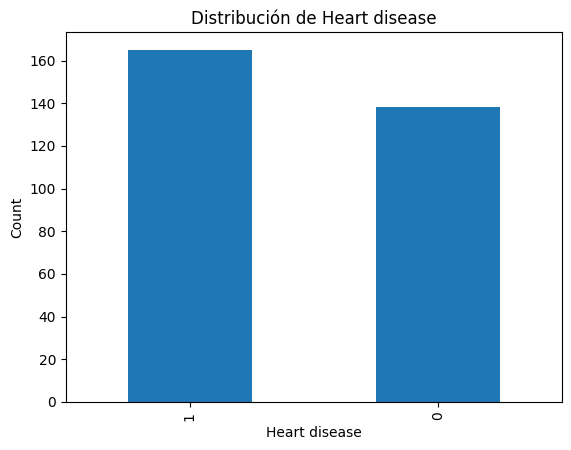

In [ ]:
import matplotlib.pyplot as plt

# Ver la distribución de la columna 'cp'
df['target'].value_counts().plot(kind='bar')
plt.xlabel('Heart disease')
plt.ylabel('Count')
plt.title('Distribución de Heart disease')
plt.show()



**Descripción de la selección de datos:**

Los datos estan muy bien distribuidos, se pueden encontrar gran cantidad de datos para ambos casos


Procederé a graficar los datos para identificar posibles relaciones entre las características (features) y la variable objetivo (label). Adicionalmente, calcularé la correlación de cada una de las características con la variable objetivo para determinar cuáles son las características más relevantes del conjunto de datos.

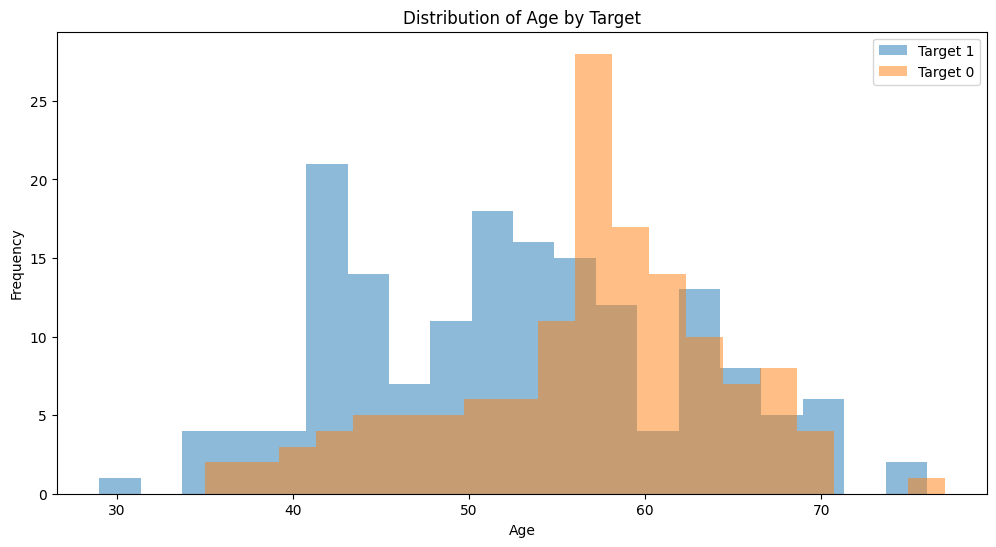

Correlación: -0.23


In [ ]:
import matplotlib.pyplot as plt

# Histogramas para comparar la distribución de la edad
plt.figure(figsize=(12, 6))
for target_type in df['target'].unique():
    plt.hist(df[df['target'] == target_type]['age'], bins=20, alpha=0.5, label=f'Target {target_type}')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Target')
plt.legend()
plt.show()
correlation_age = df[['target', 'age']].corr().iloc[0, 1]
print(f'Correlación: {correlation_age:.2f}')

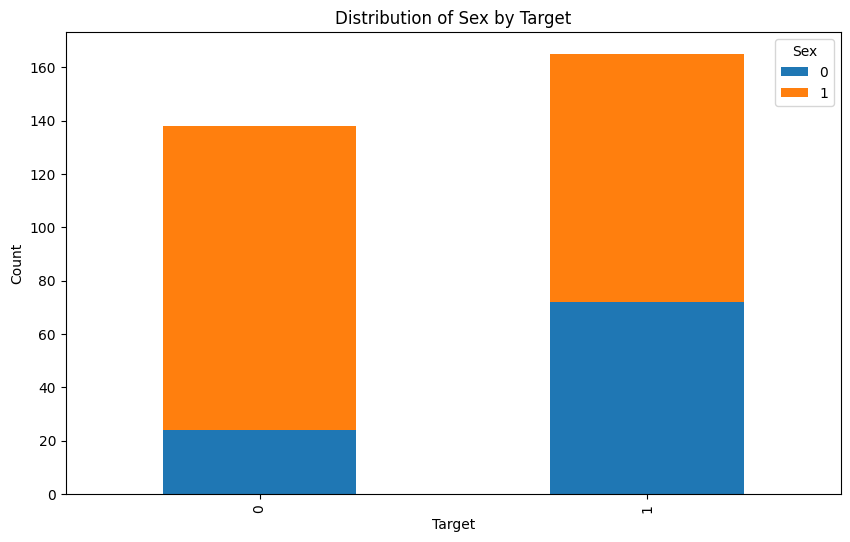

Correlación: -0.28


In [ ]:
# Contar la frecuencia de sexo por tipo de dolor en el pecho
sex_counts = df.groupby(['target', 'sex']).size().unstack()

# Graficar
sex_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Sex by Target')
plt.legend(title='Sex')
plt.show()

correlation_sex = df[['target', 'sex']].corr().iloc[0, 1]
print(f'Correlación: {correlation_sex:.2f}')


<Figure size 1200x600 with 0 Axes>

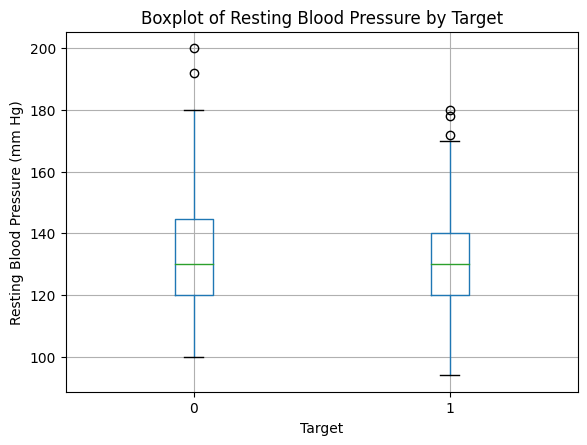

Correlación: -0.14


In [ ]:
# Gráfico de caja para presión arterial en reposo
plt.figure(figsize=(12, 6))
df.boxplot(column='trestbps', by='target')
plt.xlabel('Target')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.title('Boxplot of Resting Blood Pressure by Target')
plt.suptitle('')
plt.show()

correlation_trestbps = df[['target', 'trestbps']].corr().iloc[0, 1]
print(f'Correlación: {correlation_trestbps:.2f}')

<Figure size 1200x600 with 0 Axes>

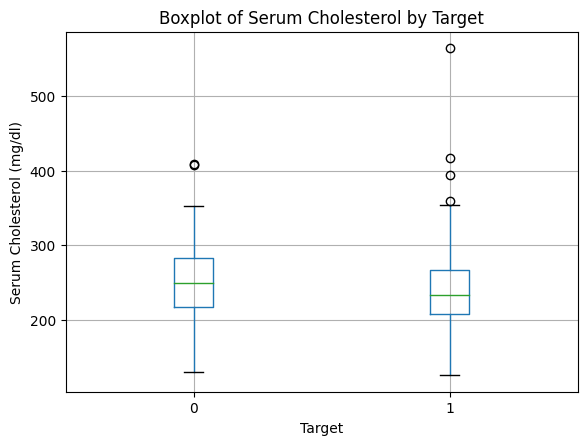

Correlación: -0.09


In [ ]:
# Gráfico de caja para colesterol
plt.figure(figsize=(12, 6))
df.boxplot(column='chol', by='target')
plt.xlabel('Target')
plt.ylabel('Serum Cholesterol (mg/dl)')
plt.title('Boxplot of Serum Cholesterol by Target')
plt.suptitle('')
plt.show()
correlation_chol = df[['target', 'chol']].corr().iloc[0, 1]
print(f'Correlación: {correlation_chol:.2f}')

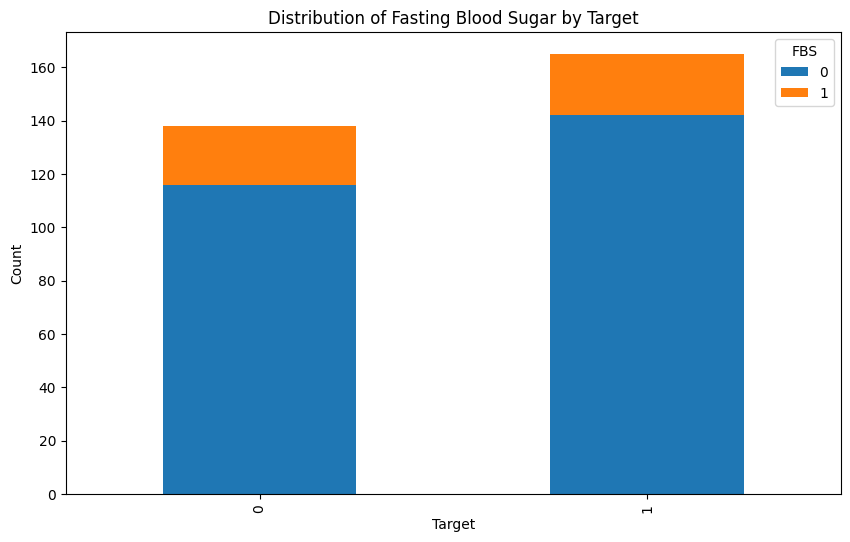

Correlación: -0.03


In [ ]:
# Contar la frecuencia de azúcar en sangre en ayunas por tipo de dolor en el pecho
fbs_counts = df.groupby(['target', 'fbs']).size().unstack()

#fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
# Graficar
fbs_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Fasting Blood Sugar by Target')
plt.legend(title='FBS')
plt.show()
# Calcular la correlación entre cp y fbs
correlation_fbs = df[['target', 'fbs']].corr().iloc[0, 1]
print(f'Correlación: {correlation_fbs:.2f}')

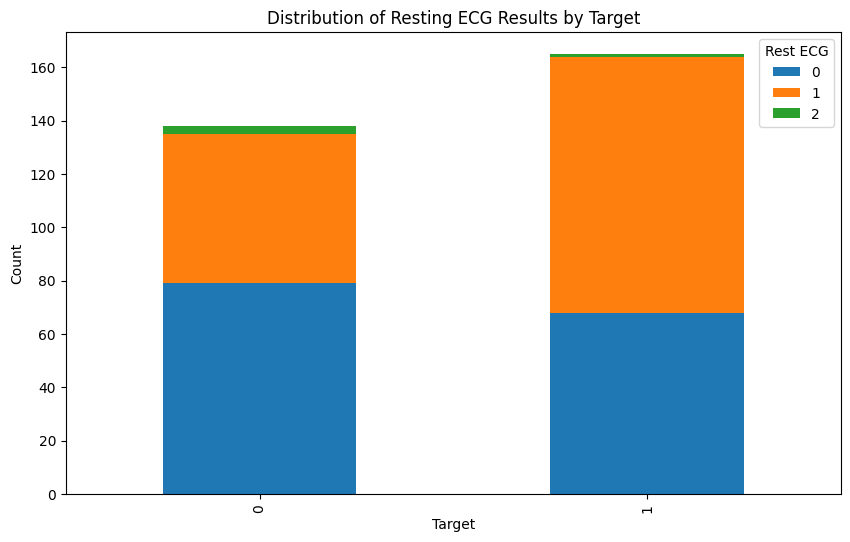

Correlación: 0.14


In [ ]:
# Contar la frecuencia de resultados electrocardiográficos por tipo de dolor en el pecho
restecg_counts = df.groupby(['target', 'restecg']).size().unstack()

# Graficar
restecg_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Resting ECG Results by Target')
plt.legend(title='Rest ECG')
plt.show()
correlation_restecg = df[['target', 'restecg']].corr().iloc[0, 1]
print(f'Correlación: {correlation_restecg:.2f}')

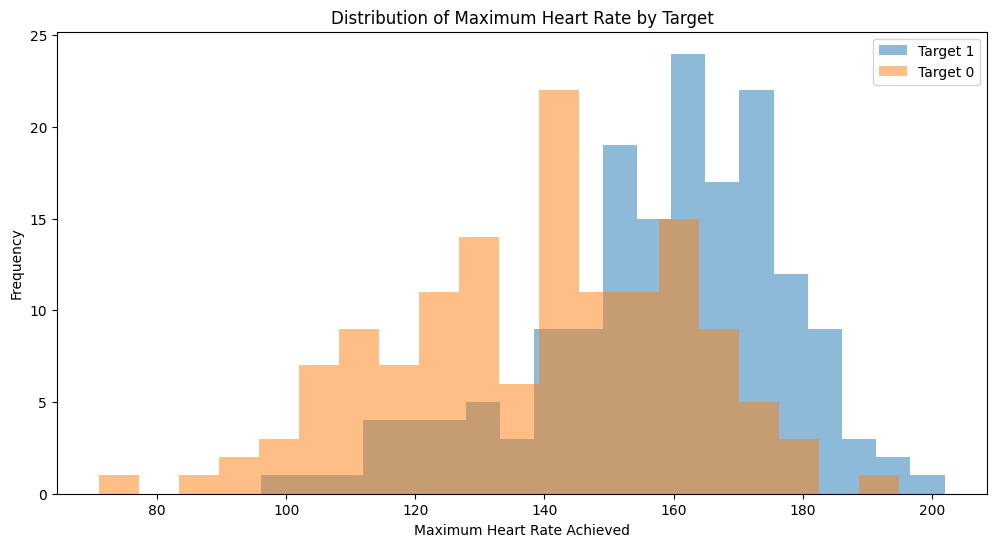

Correlación: 0.42


In [ ]:
# Histogramas para comparar la distribución de la frecuencia cardíaca máxima
plt.figure(figsize=(12, 6))
for target_type in df['target'].unique():
    plt.hist(df[df['target'] == target_type]['thalach'], bins=20, alpha=0.5, label=f'Target {target_type}')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Heart Rate by Target')
plt.legend()
plt.show()
# Calcular la correlación entre cp y thalach
correlation_thalach = df[['target', 'thalach']].corr().iloc[0, 1]
print(f'Correlación: {correlation_thalach:.2f}')

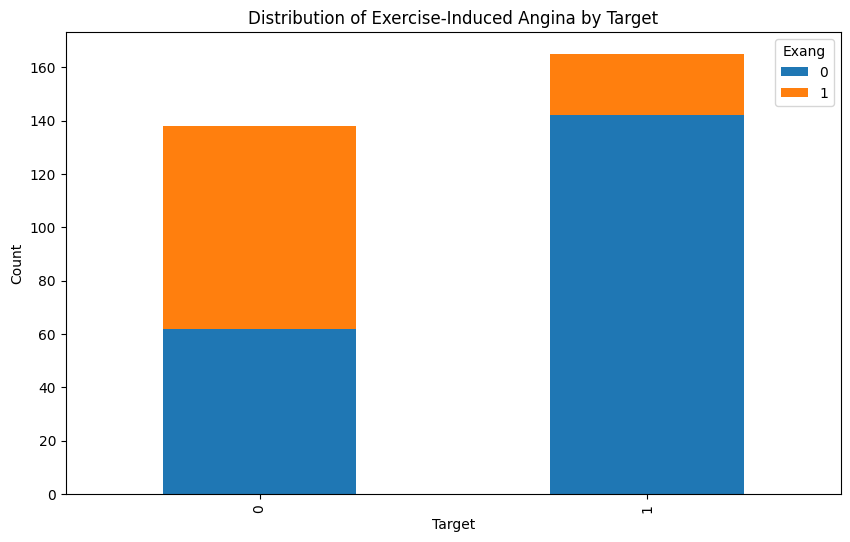

Correlación: -0.44


In [ ]:
# Contar la frecuencia de angina inducida por ejercicio por tipo de dolor en el pecho
exang_counts = df.groupby(['target', 'exang']).size().unstack()

# Graficar
exang_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Exercise-Induced Angina by Target')
plt.legend(title='Exang')
plt.show()

# Calcular la correlación entre cp y exang
correlation_exang = df[['target', 'exang']].corr().iloc[0, 1]
print(f'Correlación: {correlation_exang:.2f}')

<Figure size 1200x600 with 0 Axes>

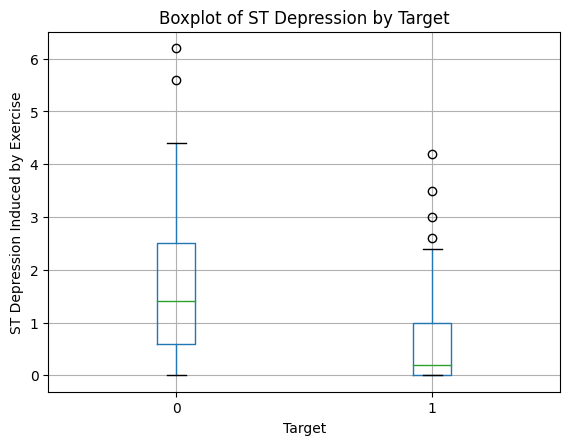

Correlación: -0.43


In [ ]:
# Gráfico de caja para depresión del ST inducida por ejercicio
plt.figure(figsize=(12, 6))
df.boxplot(column='oldpeak', by='target')
plt.xlabel('Target')
plt.ylabel('ST Depression Induced by Exercise')
plt.title('Boxplot of ST Depression by Target')
plt.suptitle('')
plt.show()

# Calcular la correlación entre cp y oldpeak
correlation_oldpeak = df[['target', 'oldpeak']].corr().iloc[0, 1]
print(f'Correlación: {correlation_oldpeak:.2f}')

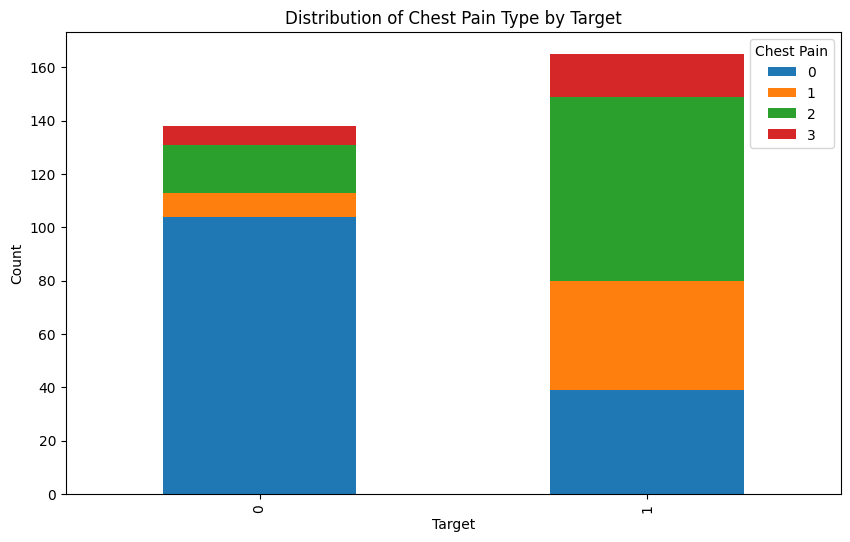

Correlación: 0.43


In [ ]:
# Contar la frecuencia de pacientes con y sin enfermedad cardíaca por tipo de dolor en el pecho
target_counts = df.groupby(['target', 'cp']).size().unstack()

# Graficar
target_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Type by Target')
plt.legend(title='Chest Pain')
plt.show()

# Calcular la correlación entre cp y target
correlation_target = df[['target', 'cp']].corr().iloc[0, 1]
print(f'Correlación: {correlation_target:.2f}')

Este es el análisis de las features en relación con el label (target)

1. **Edad (Age)**: Aunque la correlación es débil, la distribución de la edad no muestra diferencias significativas entre los grupos. Podríamos descartar este feature.

2. **Sexo (Sex)**: La correlación es débil, pero la distribución de género podría ser relevante. Mantengamos este feature.

3. **Tipo de dolor en el pecho (Chest Pain Type)**: La correlación es moderada y las distribuciones varían entre los grupos. Mantengamos este feature.

4. **Presión arterial en reposo (Resting Blood Pressure)**: La correlación es débil y las distribuciones son similares. Podríamos descartar este feature.

5. **Colesterol sérico (Serum Cholesterol)**: La correlación es muy débil y las distribuciones son similares. Descartemos este feature.

6. **Azúcar en sangre en ayunas (Fasting Blood Sugar)**: La correlación es extremadamente débil y las proporciones son similares. Descartemos este feature.

7. **Resultados electrocardiográficos en reposo (Resting ECG Results)**: La correlación es moderada y las distribuciones varían. Mantengamos este feature.

8. **Frecuencia cardíaca máxima alcanzada (Maximum Heart Rate Achieved)**: La correlación es moderada y las distribuciones difieren entre los grupos. Mantengamos este feature.

9. **Angina inducida por ejercicio (Exercise-Induced Angina)**: La correlación es moderada y las distribuciones varían. Mantengamos este feature.

10. **Depresión del segmento ST inducida por ejercicio (ST Depression Induced by Exercise)**: La correlación es moderada y las distribuciones difieren. Mantengamos este feature.

En resumen, considero que las features relevantes son las siguientes:
- Sexo (Sex)
- Tipo de dolor en el pecho (Chest Pain Type)
- Resultados electrocardiográficos en reposo (Resting ECG Results)
- Frecuencia cardíaca máxima alcanzada (Maximum Heart Rate Achieved)
- Angina inducida por ejercicio (Exercise-Induced Angina)
- Depresión del segmento ST inducida por ejercicio (ST Depression Induced by Exercise)

Parte 2: Dividir los datos en training set, validation set y test set.

In [ ]:
import pandas as pd
import numpy as np

# Establecemos las proporciones para cada conjunto
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

# Barajamos el DataFrame para mezclar las filas
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculamos los tamaños de cada conjunto
train_size = int(train_ratio * len(df_shuffled))
validation_size = int(validation_ratio * len(df_shuffled))
test_size = len(df_shuffled) - train_size - validation_size

# Dividimos el DataFrame
train_set = df_shuffled.iloc[:train_size]
validation_set = df_shuffled.iloc[train_size:train_size + validation_size]
test_set = df_shuffled.iloc[train_size + validation_size:]

# Ahora los tres conjuntos de datos estan divididos

train_set.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
3,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


Ahora dividiré los datos en label y features

In [ ]:
X_train = train_set[['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y_train = train_set['target']

X_val = validation_set[['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y_val = validation_set['target']

X_test = test_set[['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y_test = test_set['target']

**Parte 3: Escalar los datos**

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

**Parte 4: Theta**

In [ ]:
# Crear valor theta con valores iniciales
theta = np.random.randn(len(X_train_scaled[0]) + 1, 1)
theta

array([[-0.05341148],
       [ 1.53704339],
       [ 0.21010841],
       [-0.46832746],
       [ 1.52767285],
       [-0.33596714],
       [-0.36040568],
       [ 2.59670566],
       [ 0.78977744],
       [-0.63354672],
       [-1.39320302],
       [-0.63320876]])

In [ ]:
# Añadir x0 (columna de 1s) en X para multiplicar theta y obtener bias coeficient
X_vect = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]
print(X_vect[:5])
print(X_vect.shape)

[[ 1.00000000e+00  3.01639277e-01  6.50245178e-01 -9.21029833e-01
   1.08999360e+00 -1.03160798e+00 -1.66179963e+00  1.45521375e+00
  -4.03449061e-01 -6.20111358e-01  2.39110181e-01 -2.17207788e+00]
 [ 1.00000000e+00  5.15510604e-01  6.50245178e-01  2.02256300e+00
   2.24308065e+00 -1.03160798e+00  3.96138665e-01 -6.87184271e-01
  -7.33685358e-01 -6.20111358e-01 -7.17330542e-01  1.12885768e+00]
 [ 1.00000000e+00  3.01639277e-01  6.50245178e-01  1.04136539e+00
   1.08999360e+00  8.70138901e-01  1.00914156e+00 -6.87184271e-01
  -7.33685358e-01  9.63787533e-01  2.39110181e-01  1.12885768e+00]
 [ 1.00000000e+00  1.94703614e-01 -1.53788145e+00 -9.21029833e-01
   1.67523967e-01 -1.03160798e+00  2.06537364e-03  1.45521375e+00
   6.69818904e-01 -6.20111358e-01  1.19555090e+00  1.12885768e+00]
 [ 1.00000000e+00  1.79873857e+00 -1.53788145e+00  1.04136539e+00
  -1.21618049e+00 -1.03160798e+00 -8.73653051e-01 -6.87184271e-01
  -8.98803506e-01  9.63787533e-01  2.39110181e-01 -5.21610099e-01]]
(212

**Parte 5: Hacer regresión Logistica**

In [ ]:
#Definir la función sigmoide
def sigmoid_function(X):
  return 1/(1+math.e**(-X))

In [ ]:
def log_regression3(X, y, theta, alpha):
  y_ = np.reshape(y, (len(y), 1)) # shape (161,1)
  N = len(X)
  epoch = 0
  avg_loss_list = []
  prev_avg_loss = float('inf')  # Inicializar prev_avg_loss con un valor alto
  avg_loss = float(0)  # Inicializar avg_loss con un valor bajo
  while abs(prev_avg_loss - avg_loss) > 0.01  : #Si la diferencia de avg_loss es menor a 0.01 entonces se acaba el bucle
    epoch = epoch + 1
    sigmoid_x_theta = sigmoid_function(X_vect.dot(theta)) # shape: (161,6).(6,1) = (161,1)
    grad = (1/N) * X_vect.T.dot(sigmoid_x_theta - y_) # shapes: (6,161).(161,1) = (6, 1)
    theta = theta - (alpha * grad)
    hyp = sigmoid_function(X_vect.dot(theta)) # shape (161,6).(6,1) = (161,1)
    prev_avg_loss = avg_loss
    avg_loss = -np.sum(np.dot(y_.T, np.log(hyp) + np.dot((1-y_).T, np.log(1-hyp)))) / len(hyp)
    if epoch % 1000 == 0:
      print('epoch: {} | avg_loss: {}'.format(epoch, avg_loss))
    avg_loss_list.append(avg_loss)
  print('epoch: {} | avg_loss: {}'.format(epoch, avg_loss))
  plt.plot(np.arange(1, epoch), avg_loss_list[1:], color='red')
  plt.title('Cost function')
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.show()
  return theta


#Función similar pero para probar distintos hiperparametros
def log_regression_hyper(X, y, theta, alpha,specific_epochs):
  y_ = np.reshape(y, (len(y), 1)) # shape (161,1)
  N = len(X)
  epoch = 0
  avg_loss_list = []
  prev_avg_loss = float('inf')  # Inicializar prev_avg_loss con un valor alto
  avg_loss = float(0)  # Inicializar avg_loss con un valor bajo
  # while abs(prev_avg_loss - avg_loss) > 0.001  :
  while epoch < specific_epochs  :
    epoch = epoch + 1
    sigmoid_x_theta = sigmoid_function(X_vect.dot(theta)) # shape: (150,5).(5,1) = (150,1)
    grad = (1/N) * X_vect.T.dot(sigmoid_x_theta - y_) # shapes: (6,161).(161,1) = (6, 1)
    theta = theta - (alpha * grad)
    hyp = sigmoid_function(X_vect.dot(theta)) # shape (161,6).(6,1) = (161,1)
    prev_avg_loss = avg_loss
    avg_loss = -np.sum(np.dot(y_.T, np.log(hyp) + np.dot((1-y_).T, np.log(1-hyp)))) / len(hyp)
    if epoch % 1000 == 0:
      print('epoch: {} | avg_loss: {}'.format(epoch, avg_loss))
    avg_loss_list.append(avg_loss)
  print('epoch: {} | avg_loss: {}'.format(epoch, avg_loss))
  plt.plot(np.arange(1, epoch), avg_loss_list[1:], color='red')
  plt.title('Cost function')
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.show()
  return theta

epoch: 38 | avg_loss: 21.45890677187171


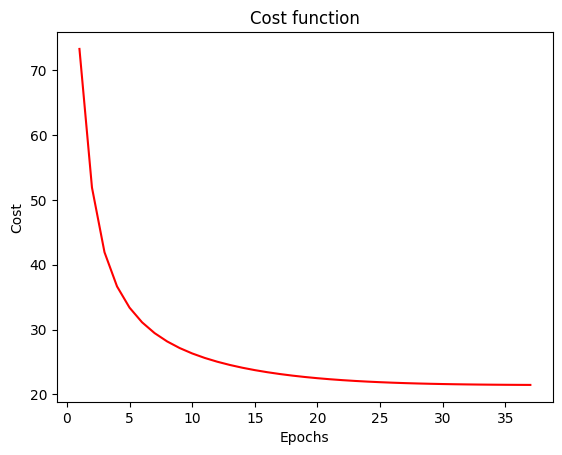

In [ ]:
alpha = 1
best_params = log_regression3(X_train_scaled, y_train, theta, alpha)

In [ ]:
print(best_params)

[[ 0.11258886]
 [-0.12118182]
 [-0.90733193]
 [ 0.69635426]
 [-0.31524333]
 [ 0.23996516]
 [ 0.58533831]
 [-0.52574917]
 [-0.61910558]
 [ 0.32854628]
 [-0.63201341]
 [-0.4840067 ]]


**Parte 6: Probar datos en el validation set y utilizar diferentes hyperparametros para ver si hay mejorías**

In [ ]:
def predict_log_regression(X, theta):
    X_to_predict = np.c_[np.ones((len(X), 1)), X] # añadir x0 para bias
    # print(X_to_predict)
    # calcular la probabilidad con la función sigmoide
    pred_probability = sigmoid_function(X_to_predict.dot(theta))
    return pred_probability


In [ ]:
# Hacer las predicciones con el set de validación
X_to_predict = [list(X_val_scaled[0])]

X_vect_val = [list(X_val_scaled)]

X_to_predict = np.c_[np.ones((len(X_to_predict), 1)), X_to_predict] # add x0 for bias

pred_probability = sigmoid_function(X_to_predict.dot(best_params))

print("La predicción para el dato de validation es:", pred_probability)

La predicción para el dato de validation es: [[0.29913756]]


In [ ]:
y_true = y_val
y_pred = np.array([predict_log_regression(x, best_params) for x in X_vect_val])

pred_val = (y_pred >= 0.5).astype(int).flatten()


conf_matrix = pd.crosstab(pd.Series(y_true.values, name='Actual'), pd.Series(pred_val, name='Predicted'))

# # Visualiza la matriz de confusión
print(conf_matrix)

Predicted   0   1
Actual           
0          15   5
1           2  23


In [ ]:
accuracy = np.mean(y_true.values == pred_val)
print(f'Exactitud: {accuracy}')

Exactitud: 0.8444444444444444


Para evaluar si esta es la mejor opción en función de los hiperparámetros, analizaré cómo varía el rendimiento del modelo al modificar diferentes valores de alpha.

**Alpha 0.1**

epoch: 249 | avg_loss: 22.055582070109477


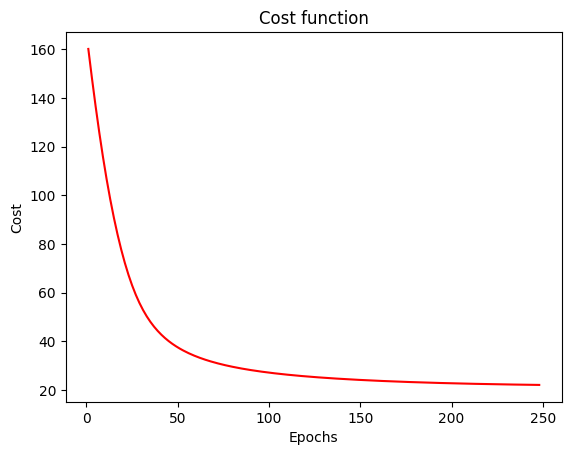

In [ ]:
alpha = 0.1
best_params01 = log_regression3(X_train_scaled, y_train, theta, alpha)

In [ ]:
y_pred = np.array([predict_log_regression(x, best_params01) for x in X_vect_val])

pred_val = (y_pred >= 0.5).astype(int).flatten()


conf_matrix = pd.crosstab(pd.Series(y_true.values, name='Actual'), pd.Series(pred_val, name='Predicted'))

# # Visualiza la matriz de confusión
print(conf_matrix)

Predicted   0   1
Actual           
0          16   4
1           2  23


In [ ]:
accuracy = np.mean(y_true.values == pred_val)
print(f'Exactitud: {accuracy}')

Exactitud: 0.8666666666666667


**Con Alpha 0.01**

epoch: 1000 | avg_loss: 27.214313226320897
epoch: 2000 | avg_loss: 22.75357554993642
epoch: 3000 | avg_loss: 21.70824069748181
epoch: 4000 | avg_loss: 21.48703352183875
epoch: 5000 | avg_loss: 21.478227829186178
epoch: 6000 | avg_loss: 21.513280175289285
epoch: 7000 | avg_loss: 21.54969381397588
epoch: 8000 | avg_loss: 21.578662040915
epoch: 9000 | avg_loss: 21.599936563683336
epoch: 10000 | avg_loss: 21.615079404315317
epoch: 11000 | avg_loss: 21.625710555351265
epoch: 12000 | avg_loss: 21.633126368876873
epoch: 13000 | avg_loss: 21.638283306796488
epoch: 14000 | avg_loss: 21.64186409820102
epoch: 15000 | avg_loss: 21.644348778319117
epoch: 16000 | avg_loss: 21.646072412427525
epoch: 17000 | avg_loss: 21.647268034894676
epoch: 18000 | avg_loss: 21.648097432931042
epoch: 19000 | avg_loss: 21.648672837550247
epoch: 20000 | avg_loss: 21.649072077406295
epoch: 20000 | avg_loss: 21.649072077406295


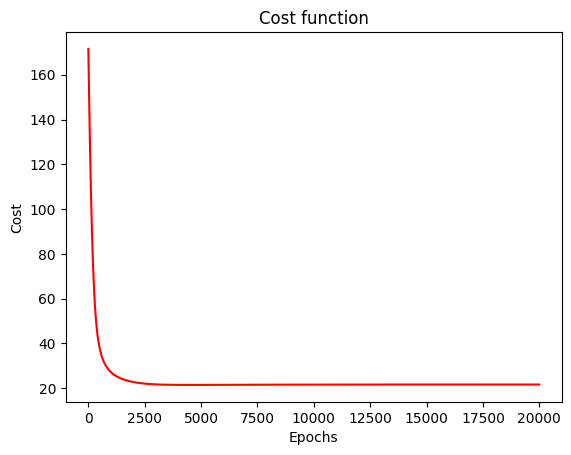

In [ ]:
alpha = 0.01
best_params001 = log_regression_hyper(X_train_scaled, y_train, theta, alpha,20000)

In [ ]:
y_pred = np.array([predict_log_regression(x, best_params001) for x in X_vect_val])

pred_val = (y_pred >= 0.5).astype(int).flatten()


conf_matrix = pd.crosstab(pd.Series(y_true.values, name='Actual'), pd.Series(pred_val, name='Predicted'))

# # Visualiza la matriz de confusión
print(conf_matrix)

Predicted   0   1
Actual           
0          15   5
1           2  23


In [ ]:
accuracy = np.mean(y_true.values == pred_val)
print(f'Exactitud: {accuracy}')

Exactitud: 0.8444444444444444


Ajuste los valores de alpha para observar si el rendimiento del modelo mejoraba, en los resultados pude darme cuenta que se conseguían mejores resultados con el alpha en 0.1 aunque consumía más epochs.




**Parte 7, probar modelo en el test set:**

In [ ]:
# Hacer predicciones en el test set
X_to_predict = [list(X_test_scaled[0])]

X_vect_test = [list(X_test_scaled)]

X_to_predict = np.c_[np.ones((len(X_to_predict), 1)), X_to_predict] # añadir x0 para el bias

pred_probability = sigmoid_function(X_to_predict.dot(best_params01))

print("La predicción para el dato de test es:", pred_probability)

La predicción para el dato de test es: [[0.69205194]]


In [ ]:
y_true = y_test
y_pred = np.array([predict_log_regression(x, best_params01) for x in X_vect_test])

pred_val = (y_pred >= 0.5).astype(int).flatten()


conf_matrix = pd.crosstab(pd.Series(y_true.values, name='Actual'), pd.Series(pred_val, name='Predicted'))

# # Visualiza la matriz de confusión
print(conf_matrix)

Predicted   0   1
Actual           
0          17   4
1           3  22


In [ ]:
accuracy = np.mean(y_true.values == pred_val)
print(f'Exactitud: {accuracy}')

Exactitud: 0.8478260869565217


# **Reporte final de lo aprendido**

En este trabajo, he desarrollado un modelo de regresión logística para clasificar enfermedades cardíacas. A través del análisis de datos y la selección de características, he aprendido la importancia de utilizar métodos gráficos y de correlación para mejorar la efectividad del modelo.

**Lo Aprendido:**

1. **Importancia de la Selección de Características:**
   - Inicialmente, el modelo fue entrenado utilizando todas las características disponibles. Se observó una discrepancia minima entre la efectividad del modelo cuando se seleccionaban todas las características y cuando solo se seleccionaban las que tenían mayor correlación.
   - En este caso no hubo tanta diferencia debido a que el dataset fue creado justamente para predecir las enfermedades en el corazón por lo que todos los features tienen una base médica, aún asi lo pudimos mejorar un poco

2. **Uso de Gráficos y Correlación:**
   - Para mejorar la precisión del modelo, se llevó a cabo un análisis exhaustivo de las características utilizando gráficos y correlaciones. Este proceso permitió identificar cuáles características eran más relevantes para el modelo.
   - Se seleccionaron las características basadas en este análisis, eliminando las menos relevantes y las que presentaban una alta multicolinealidad.

3. **Ajuste de hiperparametros:**
   - Al comparar la efectividad del modelo con los datos de validación me pude dar cuenta de que con el alpha en 0.1 se conseguía un mejor rendimiento y resultados en el modelo, por lo que también pude aprender que es importante experimentar con los hiperparametros

4. **Resultados Comparativos:**
   - **Modelo con Todas las Características:**
     - Exactitud en el conjunto de validación: 0.826
     - Exactitud en el conjunto de prueba: 0.826
   - **Modelo con Características Seleccionadas:**
     - Exactitud en el conjunto de validación:  0.866
     - Exactitud en el conjunto de prueba: 0.847

**Importancia del Análisis de Datos:**

El análisis de datos, incluyendo la visualización gráfica, la modificación de hiperparametros y la evaluación de correlaciones, juega un papel crucial en la selección de características para modelos predictivos. En mi experiencia, este análisis no solo ayuda a identificar las características más influyentes, sino que también contribuye a mejorar la capacidad de generalización del modelo en datos no vistos. Al seleccionar las características adecuadas, se logra una mejor precisión y estabilidad en la predicción, como se reflejó en los resultados del modelo.

Modelo con todas las características: https://colab.research.google.com/drive/144U_YAJOld501C4JEF39MyQkFZZo4e9l?usp=sharing

